[36.43 57.53 74.93 81.14 84.56 87.74 90.03 91.73 93.18 94.58 95.63 96.39
 97.03 97.58 98.02 98.44 98.8  99.1  99.33 99.5  99.64 99.76 99.86 99.94
 99.97 99.98 99.98]


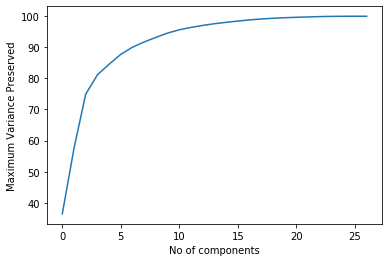

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import model_selection
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from rulefit import RuleFit
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import PCA

#Load Data
a=["date", "Day","Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
b=["Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
c=["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
d=["Appliances"]
df = pd.read_csv("energydata_complete.csv",usecols=a)
df2=  pd.read_csv("energydata_complete.csv",usecols=b)
df1 = df[['date','Day']]
data = df[['Appliances','lights','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9','T_out','Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',"Tdewpoint",'rv1', 'rv2' ]]
scaler = MinMaxScaler()
scaler.fit(data)
#print()
#print(scaler.data_max_)
data_trans = scaler.transform(data)
df2.loc[:,:]=data_trans
df2.head()
df = pd.concat([df1, df2], axis=1)
df.head()
del a[0]
del a[0]
df.head()

y=df['Appliances']
X=df[["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]]

pca = PCA(n_components=27)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print (var1)
plt.xlabel('No of components')
plt.ylabel('Maximum Variance Preserved')
plt.plot(var1)
plt.show()


In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
principalComponents = pca.fit_transform(X)

R-Squared Value: 0.11
MAE: 0.05238496382736875
MSE: 0.008492911377733732
RMSE: 0.0921569931027143


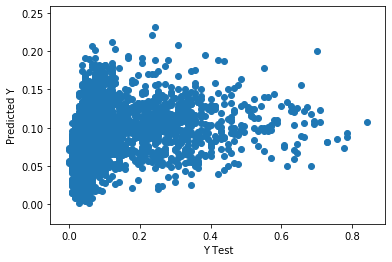

R-Squared Value: 0.07
MAE: 0.05121941319499742
MSE: 0.008143176411268918
RMSE: 0.09023955014996982


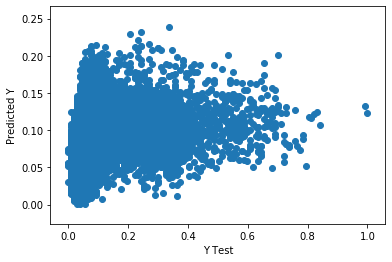

R-Squared Value: 0.11
MAE: 0.05121941319499742
MSE: 0.008143176411268918
RMSE: 0.09023955014996982


Text(0, 0.5, 'Predicted Y')

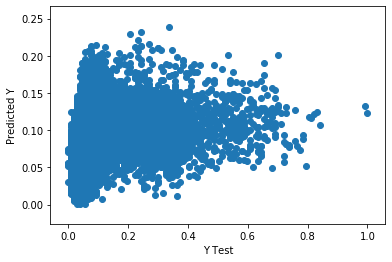

In [3]:
X=principalComponents
#Validation using Train test split
#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R-Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R-Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LinearRegression()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R-Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R Squared Value: 1.00
MAE: 0.08405255404271388
MSE: 0.010443028137631096
RMSE: 0.10219113531824126


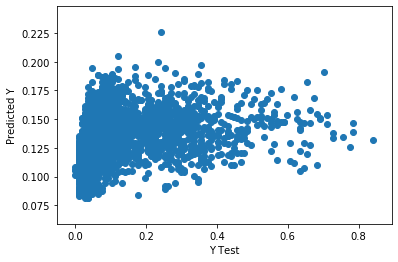

R Squared Value: -0.18
MAE: 0.08335641353221605
MSE: 0.010194437394630029
RMSE: 0.10096750662777619


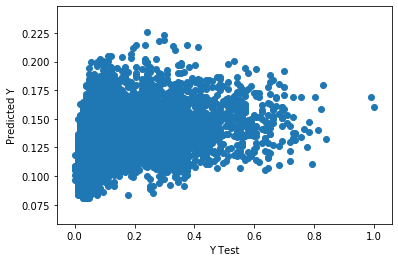

R Squared Value: -0.12
MAE: 0.08335641353221605
MSE: 0.010194437394630029
RMSE: 0.10096750662777619


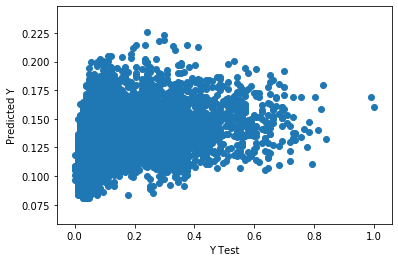

In [4]:
#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, predictions)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = SVR(kernel='rbf')
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = SVR(kernel='rbf')
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.02
MAE: 0.043348007330158624
MSE: 0.009373291264496026
RMSE: 0.09681575938087779


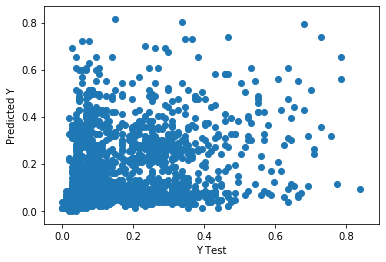

R Squared Value: -1.51
MAE: 0.01300550045107014
MSE: 0.0028122248582255374
RMSE: 0.05303041446401807


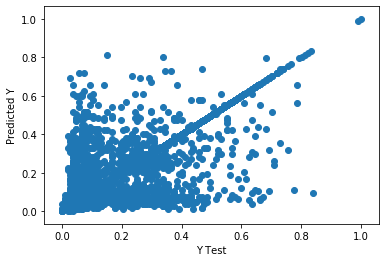

R Squared Value: -0.04
MAE: 0.01300550045107014
MSE: 0.0028122248582255374
RMSE: 0.05303041446401807


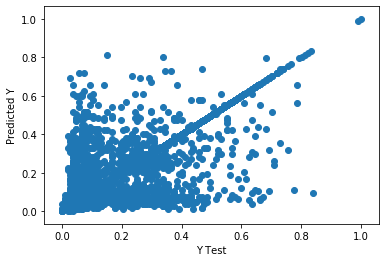

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = DecisionTreeRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = DecisionTreeRegressor()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

RMSE value for k=  1 is: 0.09732151622216116
RMSE value for k=  2 is: 0.08578507452095141
RMSE value for k=  3 is: 0.0841619036020642
RMSE value for k=  4 is: 0.08369181637920509
RMSE value for k=  5 is: 0.08299426044971407
RMSE value for k=  6 is: 0.08316237138764038
RMSE value for k=  7 is: 0.08306269086817017
RMSE value for k=  8 is: 0.08298239850972877
RMSE value for k=  9 is: 0.08331258236617073
RMSE value for k=  10 is: 0.08365101253891508
RMSE value for k=  11 is: 0.0840477156706595
RMSE value for k=  12 is: 0.08443955770647087
RMSE value for k=  13 is: 0.08484711569632147
RMSE value for k=  14 is: 0.08508440180498061
RMSE value for k=  15 is: 0.08517283841358057
RMSE value for k=  16 is: 0.0853527356832678
RMSE value for k=  17 is: 0.08550405595406521
RMSE value for k=  18 is: 0.08582617966216714
RMSE value for k=  19 is: 0.08602915277896024
RMSE value for k=  20 is: 0.08618487125290202


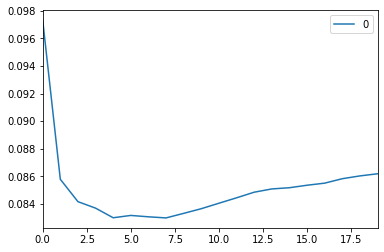

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

R Squared Value: 0.26
MAE: 0.04115716750296348
MSE: 0.007083226017923146
RMSE: 0.0841619036020642


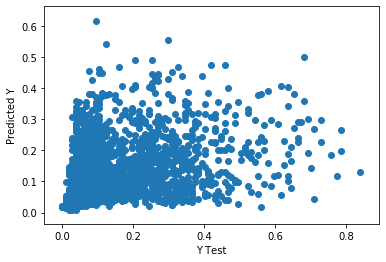

R Squared Value: -0.34
MAE: 0.030844673228691374
MSE: 0.0043204199315782
RMSE: 0.06572990135074143


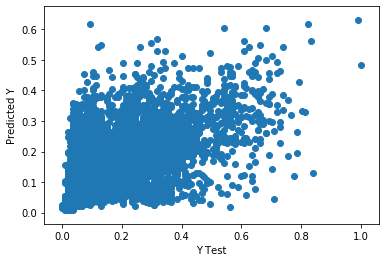

R Squared Value: 0.28
MAE: 0.030844673228691374
MSE: 0.0043204199315782
RMSE: 0.06572990135074143


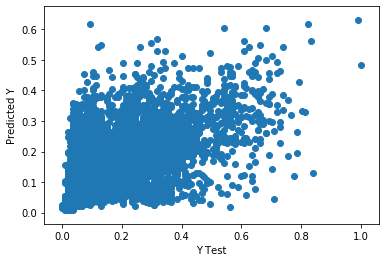

In [7]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = neighbors.KNeighborsRegressor(n_neighbors = 3)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = neighbors.KNeighborsRegressor(n_neighbors = 5)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.22
MAE: 0.04657203362558154
MSE: 0.007378892920614405
RMSE: 0.08590048265646942


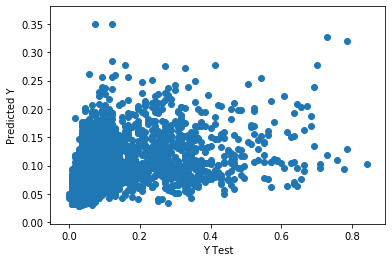

R Squared Value: 0.06
MAE: 0.043448085473956614
MSE: 0.006315046811823018
RMSE: 0.07946726880812639


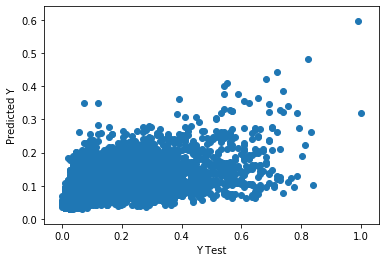

R Squared Value: 0.23
MAE: 0.043448085473956614
MSE: 0.006315046811823018
RMSE: 0.07946726880812639


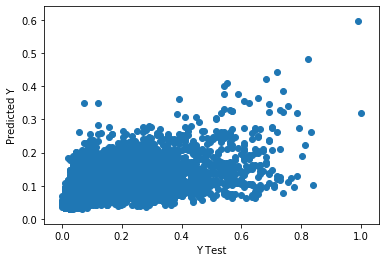

In [8]:
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = ensemble.GradientBoostingRegressor(**params)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = ensemble.GradientBoostingRegressor(**params)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.46
MAE: 0.03554886062123253
MSE: 0.005093238009014638
RMSE: 0.07136692517556462


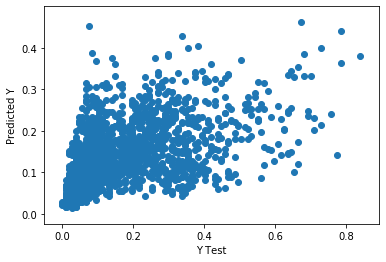

R Squared Value: -0.12
MAE: 0.019443526729161397
MSE: 0.001988769552036579
RMSE: 0.0445956225658593


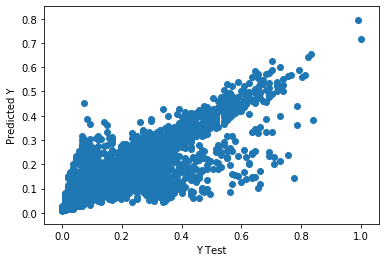

R Squared Value: 0.46
MAE: 0.019443526729161397
MSE: 0.001988769552036579
RMSE: 0.0445956225658593


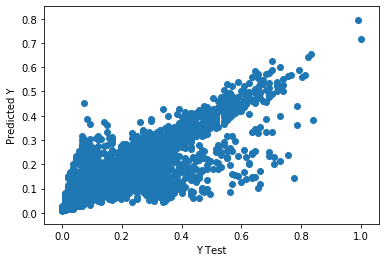

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.46
MAE: 0.035799916975378314
MSE: 0.005153320745155201
RMSE: 0.07178663347138659


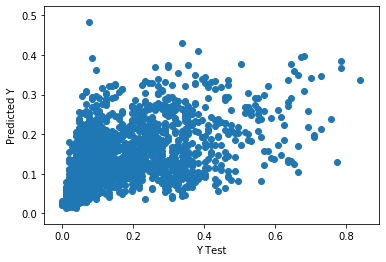

R Squared Value: -0.13
MAE: 0.019741523788326165
MSE: 0.00203315501404174
RMSE: 0.045090520223676066


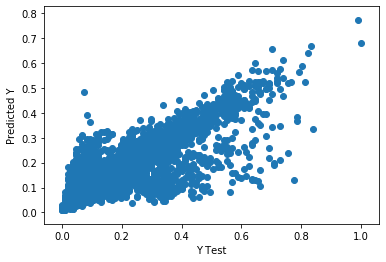

R Squared Value: 0.46
MAE: 0.019741523788326165
MSE: 0.00203315501404174
RMSE: 0.045090520223676066


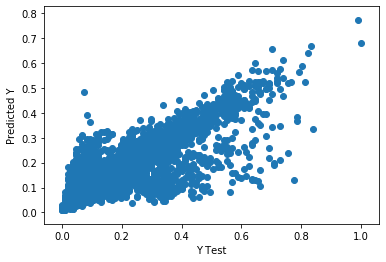

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = RandomForestRegressor(n_estimators = 100, random_state = 0)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = RandomForestRegressor(n_estimators = 100, random_state = 0)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [12]:
y=df['Appliances'].values
X=df[["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]].values
#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
rf = RuleFit()
rf.fit(X_train, y_train)
predictions=rf.predict(X_test)
rules = rf.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
print(rules)

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


                                                   rule    type          coef  \
1                                             feature_1  linear -3.590805e-02   
14                                           feature_14  linear  7.053407e-04   
3                                             feature_3  linear -7.708864e-02   
26                                           feature_26  linear  1.810322e-18   
23                                           feature_23  linear -4.284044e-03   
22                                           feature_22  linear -1.112390e-02   
20                                           feature_20  linear  3.466401e-02   
15                                           feature_15  linear  8.755092e-02   
25                                           feature_25  linear  3.132948e-03   
13                                           feature_13  linear -6.360962e-03   
11                                           feature_11  linear  8.280567e-02   
9                           

R Squared Value: 0.46
MAE: 0.04624716806403856
MSE: 0.006994247719885562
RMSE: 0.08363161913944726


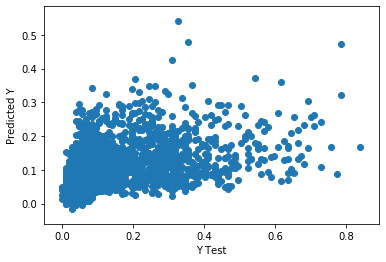

In [13]:
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()